<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Módulo 1: Teoría de Redes Neuronales



## Introducción

Las redes neuronales artificiales (RNA) constituyen un paradigma de computación inspirado en las <a href="https://es.wikipedia.org/wiki/Neurona">neuronas</a> biológicas y su interconexión. Las neuronas biológicas son células compuestas principalmente de tres partes: soma (cuerpo celular), dendritas (canales de entrada) y axón (canal de salida). Descrito de una forma muy simplificada, las neuronas transmiten información a través de procesos electroquímicos. Cuando una neurona recibe, a través de las denritas, una cantidad de estímulos mayor a un cierto umbral, ésta se despolariza excitando, a través del axón, a otras neuronas próximas conectadas a través de las sinapsis.

<img src="Figures/neurona.jpg" width="70%">

## La neurona artificial

Inspirados por esta idea se concibió el modelo de <a href="https://es.wikipedia.org/wiki/Neurona_de_McCulloch-Pitts">neurona artificial</a>. Fundamentalmente, consiste en una unidad de cálculo que admite como entrada un vector de características $\vec{x}$ cuyos valores se suman de forma ponderada mediante unos pesos $\vec{w}$ y, si esta suma supera un cierto umbral $\theta$, genera un cierto valor de salida, por ejemplo $1$ y, si no lo supera, genera otro valor, por ejemplo, un $0$. Cuando la neurona está sola, es decir, no conectada a otras conformando una red, actúa como un clasificador lineal. 

<img src="Figures/neurona_artificial.png" width="40%">

La expresión más básica de la neurona artificial es la siguiente:

$$
y=f(\textbf{x}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  x_i} \geq \theta \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$



## El Perceptrón como clasificador lineal

Volvamos de nuevo a la definición de neurona articial y veamos qué relación tiene con los problemas de clasificación lineal. Recordemos su expresión como la vimos arriba, pero vamos a modificarla ligeramente moviendo $\theta$ a la izquierda del símbolo "mayor o igual", de esta manera:

$$
g(\textbf{e}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  e_i} - \theta\geq 0 \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Si queremos, podemos visualizar gráficamente la neurona de esta manera:

<img src="Figures/model.svg" width="70%">

## Funciones de activación comunes

## 1. Sigmoide o función logística

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

This functions will squash every input to [0, 1]

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def grad_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))


Text(0.5, 1.0, 'Sigmoide')

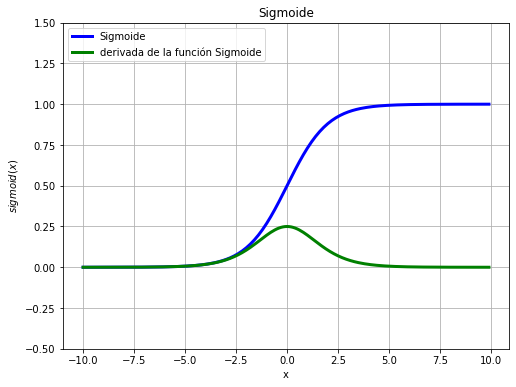

In [4]:
x = np.arange(-10,10,0.1)
plt.figure(figsize=(8,6))
plt.plot(x, sigmoid(x), label='Sigmoide', c='blue', linewidth=3)
plt.plot(x, grad_sigmoid(x), label='derivada de la función Sigmoide', c='green', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('$sigmoid(x)$')
plt.grid()
plt.ylim([-0.5,1.5])
plt.title('Sigmoide')

## Problema con la función sigmoide:
#### 1. Vanishing gradient
En la figura anterior, cuando la salida está cerca de 0 y 1, la derivada es casi cero. Lo que significa que, durante la retropropagación, los pesos se actualizarán muy, muy lentamente, casi insignificante, por lo tanto, el aprendizaje será casi nulo. Así que los pesos iniciales no cambiarán tanto de los que se han elegido.

Si se observa la derivada de sigmoide, el valor máximo es 0,25. Por lo tanto, cada gradiente se reducirá al menos al 25% de su valor (en el peor de los casos, 0) y, por lo tanto, en una red profunda, se pierde más conocimiento. Los gradientes que se propagan a las capas superficiales (capas cercanas a la capa de entrada) no serán tan significativos para actualizar los pesos.

#### 2. Not zero-centered
En el algoritmo de propagación:

$$f=\sum w_ix_i+b$$ $$\frac{df}{dw_i}=x_i$$ $$\frac{dL}{dw_i}=\frac{dL}{df}\frac{df}{dw_i}=\frac{dL}{df}x_i$$

porque $x_i>0$, el gradientet $\dfrac{dL}{dw_i}$ siempre tiene el mismo signo $\dfrac{dL}{df}$ (todos positivos o todos negativos).

Por lo tanto, si hay un peso que debe actualizarse en positivo y otro en negativo, eso no sucederá y tardará en converger.

#### 3. Computationally expensive
El cálculo del sigmoide es computacionalmente costoso


## 2. Tangente Hiperbólica

$$f = tanh(x)$$

La salida se limita a [-1, 1]. Esta función es casi la misma que la función sigmoide, pero está centrada en cero, por lo tanto, es mejor que la función sigmoide.

Además, tanh es solo una versión escalada de la sigmoide:

$$tanh(x) = 2\sigma(2x) - 1$$

Text(0.5, 1.0, 'Tangente Hiperbólica')

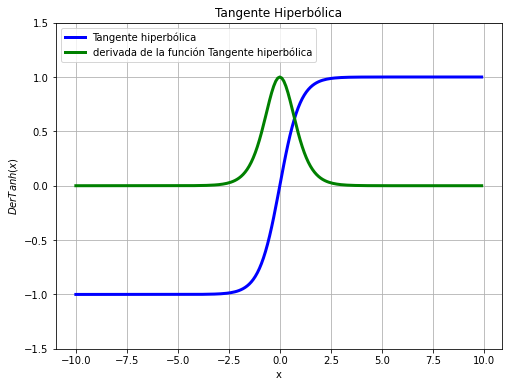

In [8]:
#np.tanh
def grad_tanh(x):
    return 1 - np.tanh(x)**2

x = np.arange(-10,10,0.1)
plt.figure(figsize=(8,6))
plt.plot(x, np.tanh(x), label='Tangente hiperbólica', c='blue', linewidth=3)
plt.plot(x, grad_tanh(x), label='derivada de la función Tangente hiperbólica', c='green', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('$DerTanh(x)$')
plt.grid()
plt.ylim([-1.5,1.5])
plt.title('Tangente Hiperbólica')

## 3. Rectified Linear Unit (ReLU)

$$f(x) = max(0, x)$$

ReLU es una de las funciones de activación más utilizadas que tiene muchas ventajas:

#### 1. Resuelve el problema del vanishing gradient 
ReLU no sufre el problema del gradiente de fuga ya que las pendientes son arbitrarias con respecto a las entradas

#### 2. Computacionalmente barato y simple de implementar
ReLU no involucra ninguna operación matemática y simplemente reemplaza x < 0 con 0.

### Problema con la ReLU

#### Problema Dying ReLU  

Debido a la naturaleza de ReLU, si un gradiente se propaga a la entrada, la red puede llegar a un estado en el que el sesgo sea muy bajo (negativo) y, por lo tanto, la salida de ReLU será 0 sin importar la entrada. Y dado que el gradiente de 0 es 0, la red no se recuperará de este estado y permanecerá siempre igual.


Text(0.5, 1.0, 'Relu')

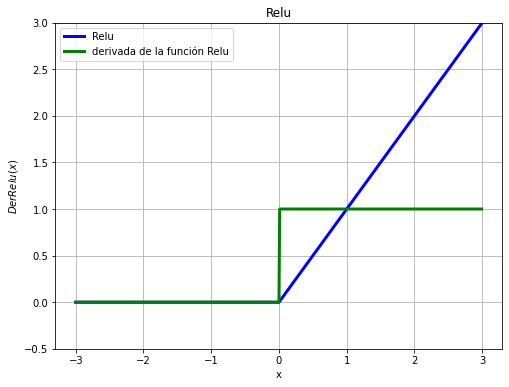

In [9]:
def relu(x):
    return np.array([max(0,i) for i in x])

def grad_relu(x):
    return np.array([1 if i>0 else 0 for i in x])

x = np.arange(-3,3,0.01)

plt.figure(figsize=(8,6))
plt.plot(x, relu(x), label='Relu', c='blue', linewidth=3)
plt.plot(x, grad_relu(x), label='derivada de la función Relu', c='green', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('$DerRelu(x)$')
plt.grid()
plt.ylim([-0.5,3])
plt.title('Relu')

## 4. Leaky ReLU

$$f_r(x) = max(\alpha x, x)$$

Leaky ReLU tiene como objetivo resolver el problema de Dying ReLU agregando un pequeño valor alfa a los valores negativos. Por tanto, el gradiente sobre los valores negativos será alpa y la red podrá recuperarse.

Text(0.5, 1.0, 'Leaky Relu')

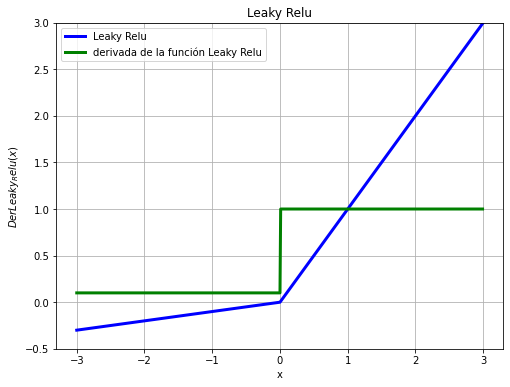

In [13]:
def leaky_relu(x):
    alpha=0.1
    return np.array([max(alpha*i, i) for i in x])

def grad_leaky_relu(x):
    alpha=0.1
    return np.array([1 if i>0 else alpha for i in x])

plt.figure(figsize=(8,6))
plt.plot(x, leaky_relu(x), label='Leaky Relu', c='blue', linewidth=3)
plt.plot(x, grad_leaky_relu(x), label='derivada de la función Leaky Relu', c='green', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('x')
plt.ylabel('$Der Leaky_Relu(x)$')
plt.grid()
plt.ylim([-0.5,3])
plt.title('Leaky Relu')

### Regla de aprendizaje

- En las RNA se considera que el conocimiento se encuentra representado en los pesos de las conexiones.

- El proceso de aprendizaje se basa en cambios en estos pesos.

### Formas de conexión entre neuronas

- Las salidas de las neuronas se convierten en entradas de otras neuronas.
- Cuando ninguna salida de las neuronas es entrada de neuronas del mismo nivel o de niveles precedentes, la red se describe como propagación hacia adelante (feedforward).

- En caso contrario la red se describe como propagación hacia atrás (feedback).

### Características de las RNA

>Topología

- Número de capas.

- Número de neuronas por capa.

- Tipo de conexiones. Normalmente, todas las neuronas de una capa reciben señales de la capa anterior (más cercana a la entrada) y envían su salida a las neuronas de la capa posterior (más cercana a la salida de la red).

>Tipos de aprendizaje

### Redes feedforward

La más conocidas son:
- perceptron
- Adaline
- Madaline
- Backpropagation

útilies en aplicaciones de reconocimiento o clasificación de patrones.

### Cómo funciona una red neuronal

<img src="Figures/red_pesos.png" width="50%">

Las redes neuronales se modelan como colecciones de neuronas que están conectadas en un gráfico acíclico. En otras palabras, las salidas de algunas neuronas pueden convertirse en entradas para otras neuronas. Los ciclos no están permitidos ya que eso implicaría un bucle infinito en el paso hacia adelante de una red. Los modelos de redes neuronales a menudo se organizan en distintas capas de neuronas.

Para las redes neuronales regulares, el tipo de capa más común es el **fully connected layer** en donde las neuronas entre dos capas adyacentes están completamente conectadas por pares, pero las neuronas dentro de una sola capa no comparten conexiones

<img src="Figures/RAN_layers.png" width="80%">

**Capa de salida**. A diferencia de todas las capas de una red neuronal, las neuronas comúnmente no tienen una función de activación (o se puede pensar que tienen una función de activación lineal). Esto se debe a que la última capa de salida se
toma para representar los scores de clase (por ejemplo, en la clasificación), o pueden ser números reales (por ejemplo, en regresión)

### Cómo aprende una red neuronal

>Por lo general, un modelo de red neuronal se entrena utilizando el Pesos y algoritmo de optimización de descenso de gradiente estocástico se actualizan usando el algoritmo backpropagation del error

>El "gradiente" en el algoritmo de gradiente descendente se refiere a un gradiente de error. El modelo con un conjunto dado de pesos se utiliza para hacer predicciones y se calcula el error de esas predicciones.

>El algoritmo de gradiente descendente busca cambiar los pesos para que la próxima iteración de tal forma que se reduzca el error, lo que significa que el algoritmo de optimización está navegando hacia abajo en el gradiente (o pendiente) del error.

<img src="Figures/gradient_descent.png" width="80%">

#### Función de coste (loss function)


La función de coste ( $l$ ), también llamada función de pérdida, loss function o cost function, es la encargada de cuantificar la distancia entre el valor real y el valor predicho por la red, en otras palabras, mide cuánto se equivoca la red al realizar predicciones. En la mayoría de casos, la función de coste devuelve valores positivos. Cuanto más próximo a cero es el valor de coste, mejor son las predicciones de la red (menor error), siendo cero cuando las predicciones se corresponden exactamente con el valor real.

La función de coste puede calcularse para una única observación o para un conjunto de datos (normalmente promediando el valor de todas las observaciones). El segundo caso, es el que se utiliza para dirigir el entrenamiento de los modelos.

Dependiendo del tipo de problema, regresión o clasificación, es necesario utilizar una función de coste u otra. En problemas de regresión, las más utilizadas son el error cuadrático medio y el error absoluto medio. En problemas de clasificación suele emplearse la función log loss, también llamada logistic loss o cross-entropy loss.


#### Error cuadrático medio

El error cuadrático medio (mean squared error, MSE) es con diferencia la función de coste más utilizada en problemas de regresión. Para una determinada observación  i , el error cuadrático se calcula como la diferencia al cuadrado entre el valor predicho  y^  y el valor real  y .

$$l^{(i)}(w,b)=(\hat{y}^{(i)}−y^{(i)})^2$$
 
Las funciones de coste suelen escribirse con la notación  $l(w,b)$  para hacer referencia a que su valor depende de los pesos y bias del modelo, ya que son estos los que determinan el valor de las predicciones  $y(i)$ .

Con frecuencia, esta función de coste se encuentra multiplicada por  1/2 , esto es simplemente por conveniencia matemática para simplificar el cálculo de su derivada.

$$l^{(i)}(w,b)=\frac{1}{2}( )^2$$
 
Para cuantificar el error que comete el modelo todo un conjunto de datos, por ejemplo los de entrenamiento, simplemente se promedia el error de todas las  $N$  observaciones.

$$L(w,b)=\frac{1}{n}\sum_{i=1}^n l^{(i)}(w,b)= \frac{1}{n}\sum_{i=1}^n (\hat{y}^{(i)}−y^{(i)})^2$$
 
Cuando un modelo se entrena utilizando el error cuadrático medio como función de coste, está aprendiendo a predecir la media de la variable respuesta.

#### Error medio absoluto

El error medio absoluto (mean absolute error, MAE) consiste en promediar el error absoluto de las predicciones.

$$L(w,b)= \frac{1}{n}\sum_{i=1}^n |\hat{y}^{(i)}−y^{(i)}|$$
 
El error medio absoluto es más robusto frente a outliers que el error cuadrático medio. Esto significa que el entrenamiento del modelo se ve menos influenciado por datos anómalos que pueda haber en el conjunto de entrenamiento. Cuando un modelo se entrena utilizando el error absoluto medio como función de coste, está aprendiendo a predecir la mediana de la variable respuesta.

#### Log loss, logistic loss o cross-entropy loss

En problemas de clasificación, la capa de salida utiliza como función de activación la función softmax. Gracias a esta función, la red devuelve una serie de valores que pueden interpretarse como la probabilidad de que la observación predicha pertenezca a cada una de las posibles clases.

Cuando la clasificación es de tipo binaria, donde la variable respuesta es 1 o 0, y  $p=Pr(y=1)$ , la función de coste log-likelihood se define como:

$$L_{log}(y,p)=−logPr(y|p)=−(ylog(p)+(1−y)log(1−p))$$
 
Para problemas de clasificación con más de dos clases, esta fórmula se generaliza a:

$$L_{log}(Y,P)=−logPr(Y|P)=−\frac{1}{N} \sum_{i=0}^{N-1}  \sum_{i=0}^{K-1} y_{i,k}log p_{i,k}$$
 
En ambos casos, minimizar esta la función equivale a que la probabilidad predicha para la clase correcta tienda a 1, y a 0 en las demás clases.

Dado que esta función se ha utilizado en campos diversos, se le conoce por nombres distintos: Log loss, logistic loss o cross-entropy loss, pero todos hacen referencia a lo mismo. Puede encontrarse una explicación más detallada de esta función de coste aquí.

### Múltiples capas

El modelo de red neuronal con una única capa (single-layer perceptron), aunque supuso un gran avance en el campo del machine learning, solo es capaz de aprender patrones sencillos. Para superar esta limitación, los investigadores descubrieron que, combinando múltiples capas ocultas, la red puede aprender relaciones mucho más complejas entre los predictores y la variable respuesta. A esta estructura se le conoce como perceptrón multicapa o multilayer perceptron (MLP), y puede considerarse como el primer modelo de deep learning.

La estructura de un perceptón multicapa consta de varias capas de neuronas ocultas. Cada neurona está conectada a todas las neuronas de la capa anterior y a las de la capa posterior. Aunque no es estrictamente necesario, todas las neuronas que forman parte de una misma capa suelen emplear la misma función de activación.

Combinando múltiples capas ocultas y funciones de activación no lineales, los modelos de redes pueden aprender prácticamente cualquier patrón. De hecho, está demostrado que, con suficientes neuronas, un MLP es un aproximador universal para cualquier función.

red neuronal feed-forward (multi-layer perceptron):
<img src="Figures/multilayer.png" width="60%">

### Entrenamiento

El proceso de entrenamiento de una red neuronal consiste en ajustar el valor de los pesos y bías de tal forma que, las predicciones que se generen, tengan el menor error posible. Gracias a esto, el modelo es capaz de identificar qué predictores tienen mayor influencia y de qué forma están relacionados entre ellos y con la variable respuesta.

La idea intuitiva de cómo entrenar una red neuronal es la siguiente:

>Iniciar la red con valores aleatorios de los pesos y bias.

>Para cada observación de entrenamiento $( X ,  y )$, calcular el error que comete la red al hacer sus predicciones. Promediar los errores de todas las observaciones.

>Identificar la responsabilidad que ha tenido cada peso y bias en el error de la predicción.

>Modificar ligeramente los pesos y bias de la red (de forma proporcional a su responsabilidad en el error) en la dirección correcta para que se reduzca el error.

Repetir los pasos 2, 3, 4 y 5 hasta que la red sea suficientemente buena.

Si bien la idea parece sencilla, alcanzar una forma de implementarla ha requerido la combinación de múltiples métodos matemáticos, en concreto, el algoritmo de retropropagación (backpropagation) y la optimización por descenso de gradiente (gradient descent).

### Backpropagation


Backpropagation es el algoritmo que permite cuantificar la influencia que tiene cada peso y bias de la red en sus predicciones. Para conseguirlo, hace uso de la regla de la cadena (chain rule) para calcular el gradiente, que no es más que es el vector formado por las derivadas parciales de una función.

En el caso de las redes, la derivada parcial del error respecto a un parámetro (peso o bias) mide cuanta "responsabilidad" ha tenido ese parámetro en el error cometido. Gracias a esto, se puede identificar qué pesos de la red hay que modificar para mejorarla. El siguiente paso necesario, es determinar cuánto y cómo modificarlos (optimización).


### Descenso de gradiente


Descenso de gradiente (gradient descent) es un algoritmo de optimización que permite minimizar una función haciendo actualizaciones de sus parámetros en la dirección del valor negativo de su gradiente. Aplicado a las redes neuronales, el descenso de gradiente permite ir actualizando los pesos y bías del modelo para reducir su error.

Dado que, calcular el error del modelo para todas las observaciones de entrenamiento, en cada iteración, puede ser computacionalmente muy costoso, existe una alternativa al método de descenso de gradiente llamada gradiente estocástico (stochastic gradient descent, SGD). Este método consiste en dividir el conjunto de entrenamiento en lotes (minibatch o batch) y actualizar los parámetros de la red con cada uno. De esta forma, en lugar de esperar a evaluar todas las observaciones para actualizar los parámetros, se pueden ir actualizando de forma progresiva. Una ronda completa de iteraciones sobre todos los batch se llama época. El número de épocas con las que se entrena una red equivale al número de veces que la red ve cada ejemplo de entrenamiento.


### Preprocesado


A la hora de entrenar modelos basados en redes neuronales, es necesario realizar, al menos, dos tipos de transformaciones de los datos.

#### Binarización (One hot ecoding) de las variables categóricas

La binarización (one-hot-encoding) consiste en crear nuevas variables dummy con cada uno de los niveles de las variables cualitativas. Por ejemplo, una variable llamada color que contenga los niveles rojo, verde y azul, se convertirá en tres nuevas variables (color_rojo, color_verde, color_azul), todas con el valor 0 excepto la que coincide con la observación, que toma el valor 1.


##### Estandarización y escalado de variables numéricas

Cuando los predictores son numéricos, la escala en la que se miden, así como la magnitud de su varianza pueden influir en gran medida en el modelo. Si no se igualan de alguna forma los predictores, aquellos que se midan en una escala mayor o que tengan más varianza dominarán el modelo aunque no sean los que más relación tienen con la variable respuesta. Existen principalmente 2 estrategias para evitarlo:

- Centrado: consiste en restarle a cada valor la media del predictor al que pertenece. Si los datos están almacenados en un dataframe, el centrado se consigue restándole a cada valor la media de la columna en la que se encuentra. Como resultado de esta transformación, todos los predictores pasan a tener una media de cero, es decir, los valores se centran en torno al origen.

- Normalización (estandarización): consiste en transformar los datos de forma que todos los predictores estén aproximadamente en la misma escala.

    - Normalización Z-score (StandardScaler): dividir cada predictor entre su desviación típica después de haber sido centrado, de esta forma, los datos pasan a tener una distribución normal.

    - Estandarización max-min (MinMaxScaler): transformar los datos de forma que estén dentro del rango [0, 1].

## Hiperparámetros

La gran "flexibilidad" que tienen las redes neuronales es un arma de doble filo. Por un lado, son capaces de generar modelos que aprenden relaciones muy complejas, sin embargo, sufren fácilmente el problema de sobreajuste (**overfitting**) lo que los incapacita al tratar de prdecir nuevas observaciones. La forma de minimizar este problema y conseguir modelos útiles, pasa por configurar de forma adecuada sus hiperparámetros. Algunos de los más importantes son:

### Número y tamaño de capas

La arquitectura de una red, el número de capas y el número de neuronas que forman parte de cada capa, determinan en gran medida la complejidad del modelo y con ello su potencial capacidad de aprendizaje.

La capa de entrada y salida son sencillas de establecer. La capa de entrada tiene tantas neuronas como predictores y la capa de salida tiene una neurona en problemas de regresión y tantas como clases en problemas de clasificación. En la mayoría de implementaciones, estos valores se establecen automáticamente en función del conjunto de entrenamiento. El usuario suele especificar únicamente el número de capas intermedias (ocultas) y el tamaño de las mismas.

Cuantas más neuronas y capas, mayor la complejidad de las relaciones que puede aprender el modelo. Sin embargo, dado que en cada neurona está conectada por pesos al resto de neuronas de las capas adyacentes, el número de parámetros a aprender aumenta y con ello el tiempo de entrenamiento.


### Learning rate


El learning rate o ratio de aprendizaje establece cómo de rápido pueden cambiar los parámetros de un modelo a medida que se optimiza (aprende). Este hiperparámetro es uno de los más complicados de establecer, ya que depende mucho de los datos e interacciona con el resto de hiperparámetros. Si el learning rate es muy grande, el proceso de optimización puede ir saltando de una región a otra sin que el modelo sea capaz de aprender. Si por el contrario, el learning rate es muy pequeño, el proceso de entrenamiento puede tardar demasiado y no llegar a completarse.Algunas de las recomendaciones heurísticas basadas en prueba y error son:

Utilizar un learning rate lo más pequeño posible siempre y cuando el tiempo de entrenamiento no supere las limitaciones temporales disponibles.

No utilizar un valor constante de learning rate durante todo el proceso de entrenamiento. Por lo general, utilizar valores mayores al inicio y pequeños al final.


### Algoritmo de optimización


El descenso de gradiente y el descenso de gradiente estocástico fueron de los primeros métodos de optimización utilizados para entrenar modelos de redes neuronales. Ambos utilizan directamente el gradiente para dirigir la optimización. Pronto se vio que esto genera problemas a medida que las redes aumentan de tamaño (neuronas y capas). En muchas regiones del espacio de búsqueda, el gradiente es muy proximo a cero, lo que hace que la optimización quede estancada en estas regiones. Para evitar este problema, se han desarrollado modificaciones del descenso de gradiente capaces de adaptar el learning rate en función del gradiente y subgradiente. De esta forma, el proceso de aprendizaje se ralentiza o acelera dependiendo de las características de la región del espacio de búsqueda en el que se encuentren. Aunque existen multitud de adaptaciones, suele recomendarse:

>Para conjuntos de datos pequeños: l-bfgs

>Para conjuntos de datos grandes: adam o rmsprop

La elección del algoritmo de optimización puede tener un impacto muy grande en el aprendizaje de los modelos, sobretodo en deep learning. Puede encontrarse una excelente descripción más detallada en el libro gratuito [Dive into Deep Learning](http://d2l.ai/chapter_optimization/index.html).


### Regularización


Los métodos de regularización se utilizan con el objetivo de reducir el sobreajuste (overfitting) de los modelos. Un modelo con sobreajuste memoriza los datos de entrenamiento pero es incapaz de predecir correctamente nuevas observaciones.

Los modelos de redes neuronales pueden considerarse como modelos sobre parametrizados, por lo tanto, las estrategias de regularización son fundamentales. De entre las muchas que existen, destacan la regularización L1 y L2 (weight decay), y el dropout.

#### Penalización L1 y L2

El objetivo de la penalización L1 y L2, esta última también conocida como weight decay, es evitar que los pesos tomen valores excesivamente elevados. De esta forma se evita que unas pocas neuronas dominen el comportamiento de la red y se fuerza a que las características poco informativas (ruido) tengan pesos próximos o iguales a cero.


#### Dropout

El proceso consiste en de desactivar aleatoriamente una serie de neuronas durante el proceso de entrenamiento. En concreto, durante cada iteración del entrenamiento, se ponen a cero los pesos de una fracción aleatoria de neuronas por capa. El método de dropout, descrito por Srivastava et al. en 2014, se ha convertido en un estándar para entrenar redes neuronales. El porcentaje de neuronas que suele desactivarse por capa (dropout rate) suele ser un valor entre 0.2 y 0.5.

### Perceptron

El "perceptrón" es un algoritmo simple que, dado un vector de entrada $x$ de m valores $(x_1, x_2,..., x_m)$, a menudo llamado características de entrada o simplemente características, genera un $1$ ("sí ") o un $0$ ("no"). Matemáticamente, definimos una función:

$$
f(\textbf{x}) = \begin{cases} \textrm{1, si} \sum_{i=1}^{n} {w_i  x_i + b} \geq \theta \\ \\ 0, \textrm{en caso contrario} \end{cases}
$$

Donde $w=(w_1,w_2,...,w_n)$ es un vector de pesos, $wx \sum_{i=1}^{n} {w_i x_i }$ es el producto escalar y $b$ es el sesgo . Si recuerda la geometría elemental, wx + b define un hiperplano límite que cambia de posición según los valores asignados a w y b.

Tenga en cuenta que un hiperplano es un subespacio cuya dimensión es uno menos que la de su espacio ambiental.

<img src="Figures/hiperplane.png" width="40%">

En otras palabras, ¡este es un algoritmo muy simple pero efectivo! Por ejemplo, dadas tres características de entrada, las cantidades de rojo, verde y azul en un color, el perceptrón podría intentar decidir si el color es blanco o no.

Tenga en cuenta que el perceptrón no puede expresar una respuesta "tal vez". Puede responder "sí" (1) o "no" (0), si entendemos cómo definir w y b. Este es el proceso de "entrenamiento" que se discutirá en las siguientes secciones.

## RN con TensorFlow 2.0

Hay cuatro partes principales:

>Construcción del modelo： `tf.keras.Model` con `tf.keras.layers`

>Función de pérdida de modelo： `tf.keras.losses`

>Optimizador de modelos： `tf.keras.optimizer`

>Evaluación del modelo： `tf.keras.metrics`

Hay tres formas de crear un modelo en `tf.keras`: API secuencial, API funcional y subclases de modelos. Aquí, usaremos el más simple, `Sequential()`.

El siguiente fragmento de código define una sola capa con 10 neuronas artificiales que espera 784 variables de entrada (también conocidas como características). Hay que tener en cuenta que la red es "densa", lo que significa que cada neurona en una capa está conectada a todas las neuronas ubicadas en la capa anterior y a todas las neuronas en la capa siguiente:


In [16]:
import tensorflow as tf
from tensorflow import keras

NB_CLASSES = 10
RESHAPED = 784
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES,
                             input_shape = (RESHAPED,),
                             kernel_initializer='zeros',
                             name='dense_layer',
                             activation='softmax'))

Cada neurona se puede inicializar con pesos específicos a través del parámetro `kernel_initializer`. Hay algunas opciones, las más comunes se enumeran a continuación:

>`random_uniform`: Los pesos se inicializan en pequeños valores uniformemente aleatorios en el rango de -0,05 a 0,05.

>`random_normal`: Los pesos se inicializan de acuerdo con una distribución gaussiana, con media cero y una pequeña desviación estándar de 0,05. Para aquellos de ustedes que no están familiarizados con la distribución gaussiana, piensen en una forma de "curva de campana" simétrica.

>`zero`: Todos los pesos se inicializan a cero.

Una lista completa de como inicializar está en: https://www.tensorflow.org/api_docs/python/tf/keras/initializers.

### Perceptrón Multicapa (reconocimiento de dígitos escritos a mano)

En esta sección construiremos una red que puede reconocer números escritos a mano. Para lograr este objetivo, utilizaremos MNIST (http://yann.lecun.com/exdb/mnist/), una base de datos de dígitos escritos a mano compuesta por un conjunto de entrenamiento de 60 000 ejemplos y un conjunto de prueba de 10 000 ejemplos Los ejemplos de entrenamiento son anotados por humanos con la respuesta correcta. Por ejemplo, si el dígito escrito a mano es el número "3", entonces 3 es simplemente la etiqueta asociada con ese ejemplo.

En el aprendizaje automático, cuando se dispone de un conjunto de datos con respuestas correctas, decimos que podemos realizar una forma de aprendizaje supervisado. En este caso podemos usar ejemplos de entrenamiento para mejorar nuestra red. Los ejemplos de prueba también tienen la respuesta correcta asociada a cada dígito. En este caso, sin embargo, la idea es fingir que la etiqueta es desconocida, dejar que la red haga la predicción y luego reconsiderar la etiqueta para evaluar qué tan bien nuestra red neuronal ha aprendido a reconocer dígitos. 


### One-hot encoding (OHE)

Vamos a usar OHE como una herramienta simple para codificar información utilizada dentro de redes neuronales. En muchas aplicaciones es conveniente transformar características categóricas (no numéricas) en variables numéricas. Por ejemplo, la característica categórica "dígito" con valor d en [0 – 9] se puede codificar en un vector binario con 10 posiciones, que siempre tiene valor 0 excepto la posición d-ésima donde está presente un 1.

Por ejemplo, el dígito 3 se puede codificar como [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]. Este tipo de representación se denomina codificación one-hot, o a veces simplemente one-hot, y es muy común en la minería de datos cuando el algoritmo de aprendizaje se especializa en el manejo de funciones numéricas.


### Definición de una red neuronal simple en TensorFlow 2.0

Usaremos TensorFlow 2.0 para definir una red que reconozca los dígitos escritos a mano del MNIST. Empezamos con una red neuronal muy simple y luego la mejoramos progresivamente.

Siguiendo el estilo de Keras, TensorFlow 2.0 proporciona [bibliotecas adecuadas](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) para cargar el conjunto de datos y dividirlo en conjuntos de entrenamiento, `X_train`, que se usan para el entrenamiento de nuestra red y conjuntos de prueba, `X_test`, utilizados para evaluar el rendimiento. Los datos se convierten en `float32` para usar una precisión de 32 bits al entrenar una red neuronal y se normalizan al rango [0,1]. Además, cargamos las etiquetas verdaderas en `Y_train` y `Y_test` respectivamente, y realizamos una codificación one-hot en ellas. 



In [17]:
import numpy as np

In [18]:
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # número de salidas -> número de dígitos que tenga en los datos de entrenamiento
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # Qué tantro se utiliza en el entrenamiento y cuanto en el testeo (20%)

Intuitivamente, `EPOCH` define cuánto debe durar el entrenamiento, `BATCH_SIZE` es la cantidad de muestras que alimenta a su red por cada iteración, y `VALIDATION` es la cantidad de datos reservados para verificar o probar la validez del entrenamiento. Veamos nuestro primer fragmento de código de una red neuronal en TensorFlow.


In [40]:
#Cargar el dataset MNIST
mnist = keras.datasets.mnist
# Obtener los datos de entrenamiento y testeo
(X_train, y_train), (X_test, y_test) = mnist.load_data() # 60,000 muestras, con 28x28 valores
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#Normalizar las entradas en el rango de [0,1]
X_train/=255
X_test/=255

#Aplicar onehot encoding a la variable de salida
y_train = tf.keras.utils.to_categorical(y_train, NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, NB_CLASSES)

In [38]:
X_train.max()

255.0

In [32]:
28*28

784

In [39]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [41]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)


Se puede ver en el código anterior que la capa de entrada tiene una neurona asociada a cada píxel de la imagen para un total de **28*28=784 neuronas**, una para cada píxel en las imágenes MNIST.

Normalmente, los valores asociados con cada píxel se normalizan en el rango [0,1] (lo que significa que la intensidad de cada píxel se divide por 255, el valor máximo de intensidad). La salida puede ser una de diez clases, con una clase para cada dígito.

La capa final es una sola neurona con función de activación "softmax", que es una generalización de la función sigmoidea. Como se mencionó anteriormente, la salida de una función sigmoidea está en el rango (0, 1). De manera similar, un softmax "aplasta" un vector K-dimensional de valores reales arbitrarios en un vector K-dimensional de valores reales en el rango (0, 1), de modo que todos suman 1. En nuestro caso, agrega 10 respuestas proporcionadas por la capa anterior con 10 neuronas.

In [43]:
#Crear el modelo de red neuronal multicapa
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(NB_CLASSES, 
                            input_shape=(784,),
                            name = 'dense_layer',
                            activation = 'softmax'))

Una vez que definimos el modelo, tenemos que compilarlo para que pueda ser ejecutado por `TensorFlow 2.0`. Hay algunas elecciones que se deben hacer durante la compilación. En primer lugar, debemos seleccionar un `optimizador`, que es el algoritmo específico que se utiliza para actualizar los pesos mientras entrenamos nuestro modelo. En segundo lugar, debemos seleccionar una función objetivo, que utiliza el optimizador para navegar por el espacio de ponderaciones (con frecuencia, las funciones objetivo se denominan funciones de pérdida o funciones de costo y el proceso de optimización se define como un proceso de minimización de pérdidas). Tercero, necesitamos evaluar el modelo entrenado. (Puede encontrar una lista completa de optimizadores en https://www.tensorflow.org/api_docs/python/tf/keras/optimizers).

Algunas opciones comunes para funciones objetivas son:

>`MSE`, define el error cuadrático medio entre las predicciones y los valores verdaderos. Matemáticamente, si $d$ es un vector de predicciones, $y$ es el vector de $n$ valores observados, entonces $MSE=\frac{1}{n}\sum_{i=1}^n(d-y)^2$ . Hay que tener en cuenta que esta función objetivo es el promedio de todos los errores cometidos en cada predicción. Si una predicción está muy alejada del valor real, entonces esta distancia se hace más evidente mediante la operación de elevar al cuadrado. Además, el cuadrado puede sumar el error sin importar si un valor dado es positivo o negativo.

>`binary_crossentropy`, define la pérdida logarítmica binaria. Supongamos que nuestro modelo predice $p$ mientras que el objetivo es $c$, entonces la entropía cruzada binaria se define como $\mathcal{L}=-c \ln(p) - (1-c)\ln(1-p)$. Hay que tener en cuenta que esta función objetivo es adecuada para la predicción de etiquetas binarias.

>`categorical_crossentropy`, define la pérdida logarítmica multiclase. La entropía cruzada categórica compara la distribución de las predicciones con la distribución verdadera, con la probabilidad de la clase verdadera establecida en 1 y 0 para las otras clases. Si la clase verdadera es $c$ y la predicción es $y$, entonces la entropía cruzada categórica se define como: $\mathcal{L(c,p)} = -\sum_i C_i \ln(p_i)$

One way to think about multi-class logarithm loss is to consider the true class represented as a one-hot encoded vector, and the closer the model's outputs are to that vector, the lower the loss. Note that this objective function is suitable for multi-class label predictions. It is also the default choice in association with softmax activation. A complete list of loss functions can be found at https://www.tensorflow.org/api_docs/python/tf/keras/losses.

Some common choices for metrics are:

>`Accuracy`, which defines the proportion of correct predictions with respect to the targets

>`Precision`, which defines how many selected items are relevant for a multi-label classification

>`Recall`, which defines how many selected items are relevant for a multi-label classification

A complete list of metrics can be found at https://www.tensorflow.org/api_docs/python/tf/keras/metrics.

Metrics are similar to objective functions, with the only difference that they are not used for training a model, but only for evaluating the model. However, it is important to understand the difference between metrics and objective functions. As discussed, the loss function is used to optimize your network. This is the function minimized by the selected optimizer. Instead, a metric is used to judge the performance of your network. This is only for you to run an evaluation on and it should be separated from the optimization process. On some occasions, it would be ideal to directly optimize for a specific metric. However, some metrics are not differentiable with respect to their inputs, which precludes them from being used directly.

When compiling a model in TensorFlow 2.0, it is possible to select the optimizer, the loss function, and the metric used together with a given model:

Una forma de pensar en la pérdida logarítmica multiclase es considerar la verdadera clase representada como un vector codificado one-hot, y cuanto más cerca estén las salidas del modelo de ese vector, menor será la pérdida. Tenga en cuenta que esta función objetivo es adecuada para predicciones de etiquetas de varias clases. También es la opción predeterminada en asociación con la activación de softmax. Puede encontrar una lista completa de funciones de pérdida en https://www.tensorflow.org/api_docs/python/tf/keras/losses.

Algunas opciones comunes para las métricas son:

>`Accuracy`

>`Precisión`

>`Recall`

Puede encontrar una lista completa de métricas en https://www.tensorflow.org/api_docs/python/tf/keras/metrics.

Las métricas sirven para evaluar el modelo. Es importante comprender la diferencia entre métricas y funciones objetivo. Como se discutió, la función de pérdida se utiliza para optimizar la red. Esta es la función minimizada por el optimizador seleccionado. En su lugar, se utiliza una métrica para juzgar el rendimiento de la red. Esto es solo para que ejecute una evaluación y debe estar separado del proceso de optimización. En algunas ocasiones, sería ideal optimizar directamente para una métrica específica. Sin embargo, algunas métricas no son diferenciables con respecto a sus entradas, lo que impide que se utilicen directamente.

Al compilar un modelo en TensorFlow 2.0, es posible seleccionar el optimizador, la función de pérdida y la métrica utilizada junto con un modelo determinado:

In [44]:
model.compile(optimizer='SGD', loss = 'categorical_crossentropy', metrics=['accuracy'])

>**epochs** es la cantidad de veces que el modelo se expone al conjunto de entrenamiento. En cada iteración, el optimizador intenta ajustar los pesos para que la función objetivo se minimice.

>**batch_size** es el número de instancias de entrenamiento observadas antes de que el optimizador realice una actualización de peso; suele haber muchos lotes por época.

Entrenar un modelo en TensorFlow 2.0 es muy simple:

In [45]:
model.fit(X_train, y_train,
          batch_size = BATCH_SIZE,
          epochs = EPOCHS,
          verbose= VERBOSE,
          validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 1s 2ms/step - loss: 1.3836 - accuracy: 0.6674 - val_loss: 0.8898 - val_accuracy: 0.8286
Epoch 2/200
375/375 [==============================] - 1s 1ms/step - loss: 0.7871 - accuracy: 0.8332 - val_loss: 0.6529 - val_accuracy: 0.8612
Epoch 3/200
375/375 [==============================] - 0s 1ms/step - loss: 0.6384 - accuracy: 0.8539 - val_loss: 0.5580 - val_accuracy: 0.8716
Epoch 4/200
375/375 [==============================] - 1s 1ms/step - loss: 0.5670 - accuracy: 0.8639 - val_loss: 0.5062 - val_accuracy: 0.8778
Epoch 5/200
375/375 [==============================] - 0s 1ms/step - loss: 0.5235 - accuracy: 0.8705 - val_loss: 0.4726 - val_accuracy: 0.8839
Epoch 6/200
375/375 [==============================] - 0s 1ms/step - loss: 0.4937 - accuracy: 0.8758 - val_loss: 0.4487 - val_accuracy: 0.8885
Epoch 7/200
375/375 [==============================] - 0s 1ms/step - loss: 0.4717 - accuracy: 0.8792 - val_loss: 0.4308 - val_accuracy: 0.8914

Epoch 58/200
375/375 [==============================] - 1s 1ms/step - loss: 0.3148 - accuracy: 0.9127 - val_loss: 0.3022 - val_accuracy: 0.9157
Epoch 59/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3142 - accuracy: 0.9128 - val_loss: 0.3017 - val_accuracy: 0.9159
Epoch 60/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3135 - accuracy: 0.9130 - val_loss: 0.3012 - val_accuracy: 0.9157
Epoch 61/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3128 - accuracy: 0.9133 - val_loss: 0.3007 - val_accuracy: 0.9157
Epoch 62/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3122 - accuracy: 0.9137 - val_loss: 0.3003 - val_accuracy: 0.9158
Epoch 63/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3116 - accuracy: 0.9137 - val_loss: 0.2998 - val_accuracy: 0.9158
Epoch 64/200
375/375 [==============================] - 0s 1ms/step - loss: 0.3109 - accuracy: 0.9142 - val_loss: 0.2994 - val_accuracy:

Epoch 115/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2911 - accuracy: 0.9188 - val_loss: 0.2848 - val_accuracy: 0.9202
Epoch 116/200
375/375 [==============================] - 0s 984us/step - loss: 0.2908 - accuracy: 0.9190 - val_loss: 0.2847 - val_accuracy: 0.9208
Epoch 117/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2906 - accuracy: 0.9191 - val_loss: 0.2845 - val_accuracy: 0.9205
Epoch 118/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2904 - accuracy: 0.9190 - val_loss: 0.2843 - val_accuracy: 0.9204
Epoch 119/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2901 - accuracy: 0.9190 - val_loss: 0.2841 - val_accuracy: 0.9204
Epoch 120/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2899 - accuracy: 0.9192 - val_loss: 0.2839 - val_accuracy: 0.9203
Epoch 121/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2896 - accuracy: 0.9193 - val_loss: 0.2838 - val_

375/375 [==============================] - 0s 1ms/step - loss: 0.2802 - accuracy: 0.9218 - val_loss: 0.2777 - val_accuracy: 0.9222
Epoch 172/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2800 - accuracy: 0.9216 - val_loss: 0.2776 - val_accuracy: 0.9222
Epoch 173/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2799 - accuracy: 0.9218 - val_loss: 0.2775 - val_accuracy: 0.9222
Epoch 174/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.9218 - val_loss: 0.2773 - val_accuracy: 0.9222
Epoch 175/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2796 - accuracy: 0.9220 - val_loss: 0.2774 - val_accuracy: 0.9219
Epoch 176/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2794 - accuracy: 0.9222 - val_loss: 0.2773 - val_accuracy: 0.9220
Epoch 177/200
375/375 [==============================] - 0s 1ms/step - loss: 0.2793 - accuracy: 0.9220 - val_loss: 0.2771 - val_accuracy: 0.9219



Hay que tomar en cuenta que hemos reservado parte del conjunto de entrenamiento para la validación. La idea clave es que reservamos una parte de los datos de entrenamiento para medir el rendimiento en la validación durante el entrenamiento. Esta es una buena práctica a seguir para cualquier tarea de aprendizaje automático. 

Una vez que se entrena el modelo, podemos evaluarlo en el conjunto de prueba que contiene nuevos ejemplos nunca vistos por el modelo durante la fase de entrenamiento.

En TensorFlow 2.0, podemos usar el método de evaluación (X_test, Y_test) para calcular test_loss y test_acc:

In [46]:
#Evaluando el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)


313/313 [==============================] - 0s 620us/step - loss: 0.2776 - accuracy: 0.9207


### Mejorando la red simple en TensorFlow 2.0 con capas ocultas

Es un buen punto de partida, pero podemos mejorarlo. Veamos cómo.

Una mejora inicial es agregar capas adicionales a nuestra red porque estas neuronas adicionales podrían ayudarla intuitivamente a aprender patrones más complejos en los datos de entrenamiento. En otras palabras, las capas adicionales agregan más parámetros, lo que potencialmente permite que un modelo memorice patrones más complejos. Entonces, después de la capa de entrada, tenemos una primera capa densa con N_HIDDEN neuronas y una función de activación "ReLU". Esta capa adicional se considera oculta porque no está conectada directamente ni con la entrada ni con la salida. Después de la primera capa oculta, tenemos una segunda capa oculta nuevamente con N_HIDDEN neuronas seguida de una capa de salida con 10 neuronas, cada una de las cuales se disparará cuando se reconozca el dígito relativo. El siguiente código define esta nueva red:


In [51]:
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # número de salidas -> número de dígitos que tenga en los datos de entrenamiento
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # Qué tantro se utiliza en el entrenamiento y cuanto en el testeo (20%)

# Crear el modelo con capas ocultas
model2 = tf.keras.models.Sequential() 
# Añadimos la capa de entrada
model2.add(keras.layers.Dense(N_HIDDEN, input_shape=(784,),name='dense_layer', activation='relu'))
#Añadiendo capas ocultas
model2.add(keras.layers.Dense(N_HIDDEN, name='dense_layer_2', activation='relu'))
model2.add(keras.layers.Dense(NB_CLASSES, name='dense_layer_3', activation='softmax'))
#Resumen del modelo
model2.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [52]:
#Compilando el modelo
model2.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
#Entrenar al modelo
model2.fit(X_train, y_train,
           batch_size = BATCH_SIZE,
           epochs= EPOCHS,
           verbose= VERBOSE,
           validation_split = VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 1s 2ms/step - loss: 1.3903 - accuracy: 0.6481 - val_loss: 0.7062 - val_accuracy: 0.8453
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5712 - accuracy: 0.8608 - val_loss: 0.4435 - val_accuracy: 0.8832
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4307 - accuracy: 0.8845 - val_loss: 0.3715 - val_accuracy: 0.8968
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3771 - accuracy: 0.8954 - val_loss: 0.3355 - val_accuracy: 0.9045
Epoch 5/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3455 - accuracy: 0.9025 - val_loss: 0.3145 - val_accuracy: 0.9103
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.9082 - val_loss: 0.2953 - val_accuracy: 0.9158
Epoch 7/200
375/375 [==============================] - 1s 2ms/step - loss: 0.3059 - accuracy: 0.9124 - val_loss: 0.2835 - val_accuracy: 0.9187

Epoch 58/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0915 - accuracy: 0.9746 - val_loss: 0.1187 - val_accuracy: 0.9665
Epoch 59/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9753 - val_loss: 0.1177 - val_accuracy: 0.9658
Epoch 60/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0885 - accuracy: 0.9758 - val_loss: 0.1170 - val_accuracy: 0.9662
Epoch 61/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9755 - val_loss: 0.1156 - val_accuracy: 0.9667
Epoch 62/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0858 - accuracy: 0.9761 - val_loss: 0.1150 - val_accuracy: 0.9678
Epoch 63/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0845 - accuracy: 0.9767 - val_loss: 0.1148 - val_accuracy: 0.9675
Epoch 64/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0831 - accuracy: 0.9772 - val_loss: 0.1151 - val_accuracy:

Epoch 115/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0404 - accuracy: 0.9905 - val_loss: 0.0933 - val_accuracy: 0.9721
Epoch 116/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0400 - accuracy: 0.9906 - val_loss: 0.0929 - val_accuracy: 0.9727
Epoch 117/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0393 - accuracy: 0.9908 - val_loss: 0.0924 - val_accuracy: 0.9734
Epoch 118/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0389 - accuracy: 0.9909 - val_loss: 0.0931 - val_accuracy: 0.9722
Epoch 119/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0384 - accuracy: 0.9911 - val_loss: 0.0924 - val_accuracy: 0.9728
Epoch 120/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0378 - accuracy: 0.9910 - val_loss: 0.0926 - val_accuracy: 0.9726
Epoch 121/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0374 - accuracy: 0.9912 - val_loss: 0.0927 - val_ac

375/375 [==============================] - 1s 2ms/step - loss: 0.0207 - accuracy: 0.9965 - val_loss: 0.0881 - val_accuracy: 0.9739
Epoch 172/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0204 - accuracy: 0.9965 - val_loss: 0.0883 - val_accuracy: 0.9742
Epoch 173/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0202 - accuracy: 0.9966 - val_loss: 0.0884 - val_accuracy: 0.9732
Epoch 174/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0200 - accuracy: 0.9966 - val_loss: 0.0887 - val_accuracy: 0.9732
Epoch 175/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0198 - accuracy: 0.9967 - val_loss: 0.0886 - val_accuracy: 0.9737
Epoch 176/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0195 - accuracy: 0.9967 - val_loss: 0.0887 - val_accuracy: 0.9739
Epoch 177/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0194 - accuracy: 0.9968 - val_loss: 0.0890 - val_accuracy: 0.9737

In [53]:
#Evaluando el modelo
test_loss, test_accc = model2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 665us/step - loss: 0.2776 - accuracy: 0.9207


### Mejorar aún más la red simple en TensorFlow con Dropout

Una segunda mejora es muy simple. Decidimos descartar aleatoriamente, con la probabilidad DROPOUT, algunos de los valores propagados dentro de nuestra densa red interna de capas ocultas durante el entrenamiento. En el aprendizaje automático, esta es una forma bien conocida de regularización. Sorprendentemente, esta idea de descartar aleatoriamente algunos valores puede mejorar nuestro rendimiento. La idea detrás de esta mejora es que la caída aleatoria obliga a la red a aprender patrones redundantes que son útiles para una mejor generalización:

In [54]:
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10 # número de salidas -> número de dígitos que tenga en los datos de entrenamiento
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2 # Qué tantro se utiliza en el entrenamiento y cuanto en el testeo (20%)

# Crear el modelo con capas ocultas
model2 = tf.keras.models.Sequential() 
# Añadimos la capa de entrada
model2.add(keras.layers.Dense(N_HIDDEN, input_shape=(784,),name='dense_layer', activation='relu'))
#Añadiendo capas ocultas
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(N_HIDDEN, name='dense_layer_2', activation='relu'))
model2.add(keras.layers.Dropout(0.3))
model2.add(keras.layers.Dense(NB_CLASSES, name='dense_layer_3', activation='softmax'))
#Resumen del modelo
model2.summary()

#Compilando el modelo
model2.compile(optimizer='SGD', loss='categorical_crossentropy', metrics=['accuracy'])
#Entrenar al modelo
model2.fit(X_train, y_train,
           batch_size = BATCH_SIZE,
           epochs= EPOCHS,
           verbose= VERBOSE,
           validation_split = VALIDATION_SPLIT)

#Evaluando el modelo
test_loss, test_accc = model2.evaluate(X_test, y_test)

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_layer (Dense)          (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_layer_2 (Dense)        (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_layer_3 (Dense)        (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
375/375 [==============================] - 1s 3ms/step - loss: 1.7074 - accuracy: 0.4509 - val_loss: 0

Epoch 51/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1783 - accuracy: 0.9477 - val_loss: 0.1237 - val_accuracy: 0.9635
Epoch 52/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1765 - accuracy: 0.9484 - val_loss: 0.1220 - val_accuracy: 0.9638
Epoch 53/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1747 - accuracy: 0.9479 - val_loss: 0.1216 - val_accuracy: 0.9638
Epoch 54/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1724 - accuracy: 0.9494 - val_loss: 0.1200 - val_accuracy: 0.9645
Epoch 55/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1704 - accuracy: 0.9505 - val_loss: 0.1192 - val_accuracy: 0.9645
Epoch 56/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1723 - accuracy: 0.9482 - val_loss: 0.1182 - val_accuracy: 0.9647
Epoch 57/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1708 - accuracy: 0.9504 - val_loss: 0.1175 - val_accuracy:

Epoch 108/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9660 - val_loss: 0.0920 - val_accuracy: 0.9726
Epoch 109/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1150 - accuracy: 0.9656 - val_loss: 0.0911 - val_accuracy: 0.9727
Epoch 110/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1108 - accuracy: 0.9664 - val_loss: 0.0916 - val_accuracy: 0.9723
Epoch 111/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1107 - accuracy: 0.9664 - val_loss: 0.0917 - val_accuracy: 0.9721
Epoch 112/200
375/375 [==============================] - 1s 2ms/step - loss: 0.1118 - accuracy: 0.9661 - val_loss: 0.0906 - val_accuracy: 0.9728
Epoch 113/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1105 - accuracy: 0.9673 - val_loss: 0.0907 - val_accuracy: 0.9728
Epoch 114/200
375/375 [==============================] - 1s 3ms/step - loss: 0.1091 - accuracy: 0.9672 - val_loss: 0.0900 - val_ac

375/375 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9742 - val_loss: 0.0827 - val_accuracy: 0.9753
Epoch 165/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0872 - accuracy: 0.9726 - val_loss: 0.0823 - val_accuracy: 0.9754
Epoch 166/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0870 - accuracy: 0.9733 - val_loss: 0.0822 - val_accuracy: 0.9758
Epoch 167/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0860 - accuracy: 0.9734 - val_loss: 0.0823 - val_accuracy: 0.9754
Epoch 168/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0861 - accuracy: 0.9740 - val_loss: 0.0820 - val_accuracy: 0.9761
Epoch 169/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0847 - accuracy: 0.9736 - val_loss: 0.0819 - val_accuracy: 0.9755
Epoch 170/200
375/375 [==============================] - 1s 2ms/step - loss: 0.0824 - accuracy: 0.9751 - val_loss: 0.0821 - val_accuracy: 0.9755

In [56]:
test_loss, test_accc = model2.evaluate(X_test, y_test)

313/313 [==============================] - 0s 674us/step - loss: 0.0756 - accuracy: 0.9774
